# Quantum Fourier Transform (QFT) Code

## For a 3 qubit state (for integer 5)

'q_initial:'

<IPython.core.display.Latex object>

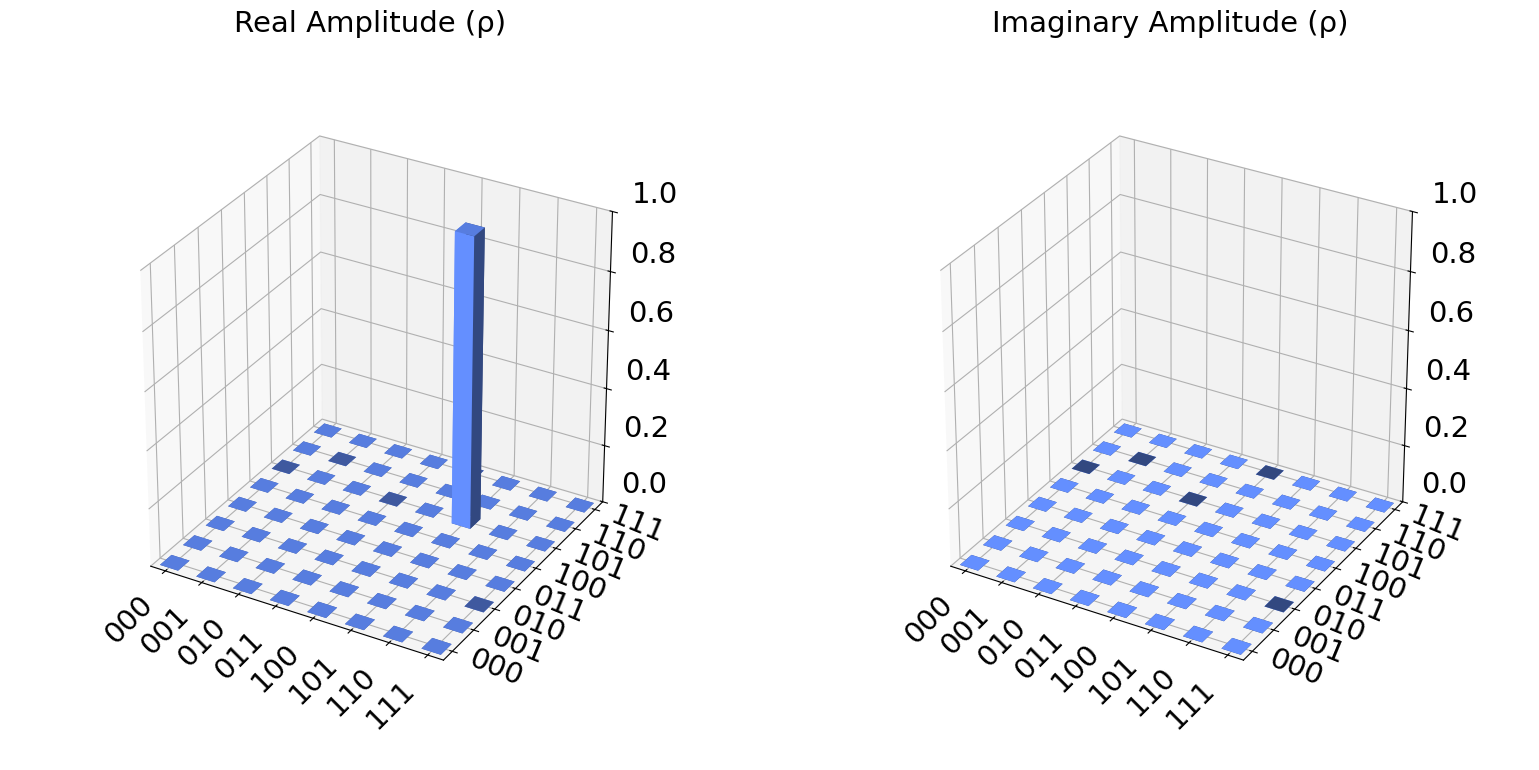

'q_final:'

<IPython.core.display.Latex object>

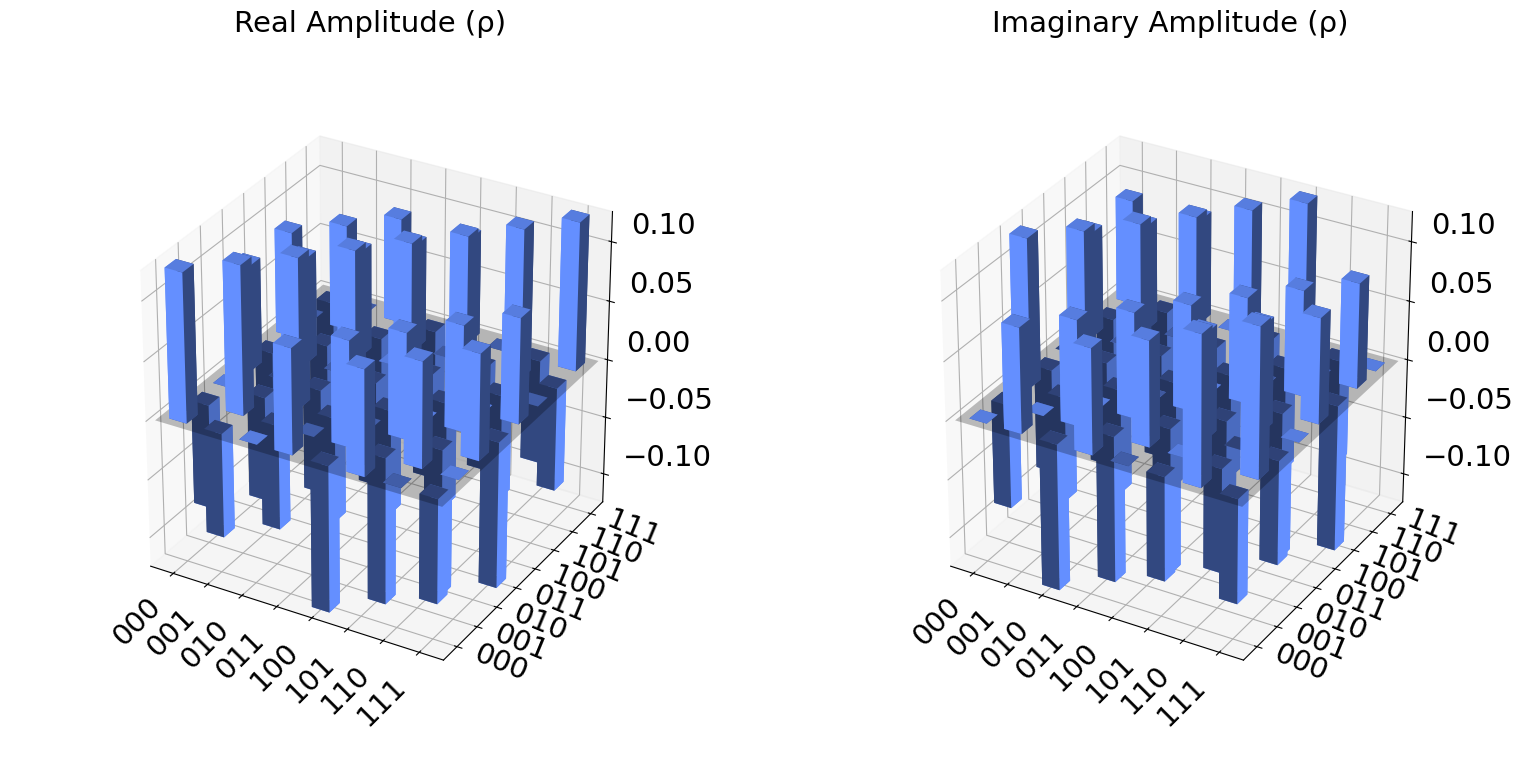

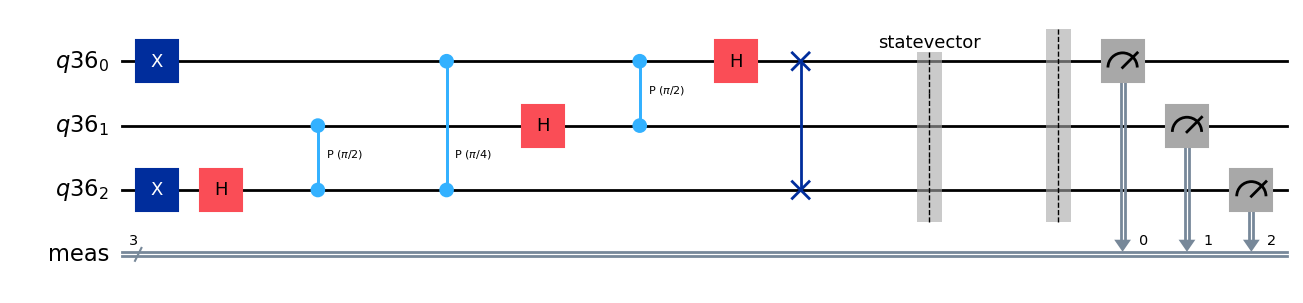

Measurement Counts: {'010': 136, '011': 124, '111': 116, '101': 129, '000': 126, '110': 136, '001': 126, '100': 131}


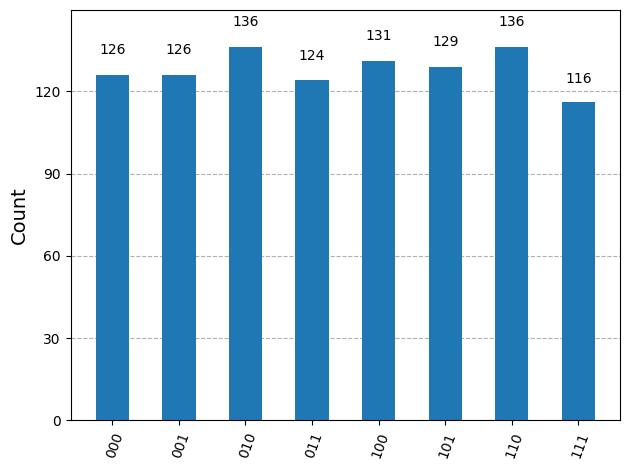

In [53]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere,plot_state_city,plot_histogram

q = QuantumRegister(3)
qc = QuantumCircuit(q)

#Statepreparation
qc.x(q[0])
qc.x(q[2])

#Simulator
simulator = AerSimulator()

#Displaying initial statevector
qc_init = qc.copy()
qc_init.save_statevector()
statevector = simulator.run(qc_init).result().get_statevector()
display("q_initial:",statevector.draw("latex"))
display(plot_state_city(statevector))


#Applying procedure of QFT
#step 1: Hadamard gate
qc.h(q[2])
#step 2: apply controlled rotations
qc.cp(np.pi/2,q[1],q[2])
qc.cp(np.pi/4,q[0],q[2])
#repeat same steps for other qubits
#step1: hadamard gate
qc.h(q[1])
#step 2: apply controlled rotation
qc.cp(np.pi/2,q[0],q[1])
#hadamard gate
qc.h(q[0])
#swap qubits before measurement
qc.swap(q[0],q[2])

#displaying final statevector
qc_fin = qc.copy()
qc_fin.save_statevector()
statevector = simulator.run(qc_fin).result().get_statevector()
display("q_final:",statevector.draw("latex"))
display(plot_state_city(statevector))

#Measurement
qc_fin.measure_all()

#Display the circuit
display(qc_fin.draw("mpl"))

# execute circuit with AerSimulator
job = simulator.run([qc_fin])
result = job.result()
counts = result.get_counts(0)
print(f"Measurement Counts: {counts}")
plot_histogram(counts)


## A generalisation of the above code for n-qubit state

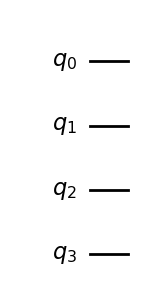

'Initial state:'

<IPython.core.display.Latex object>

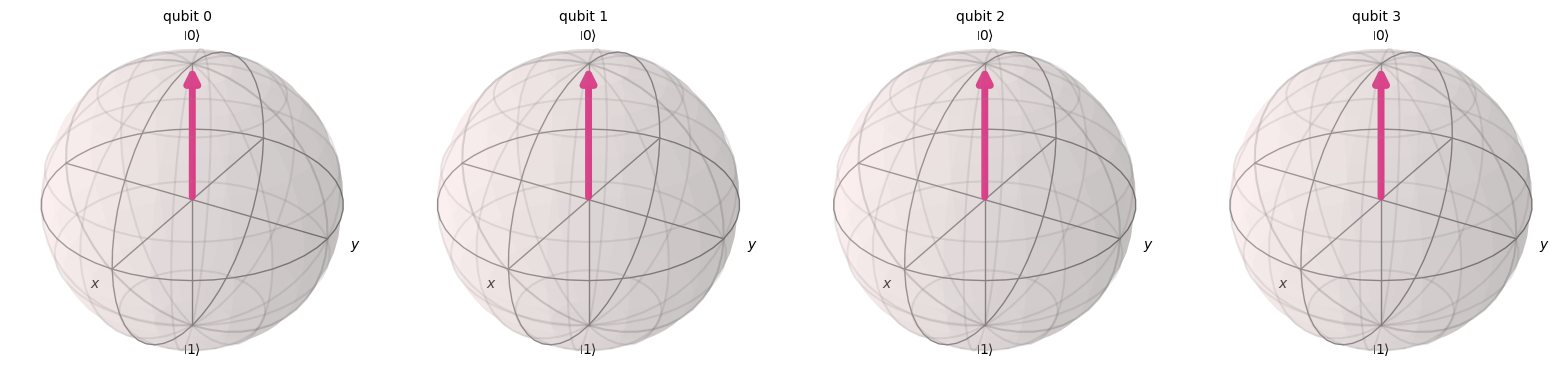

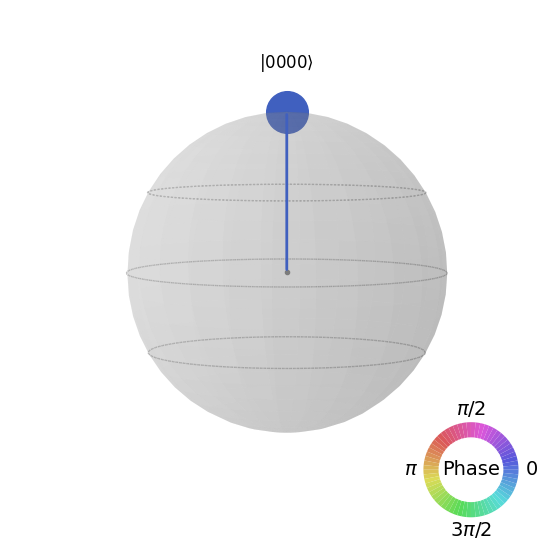

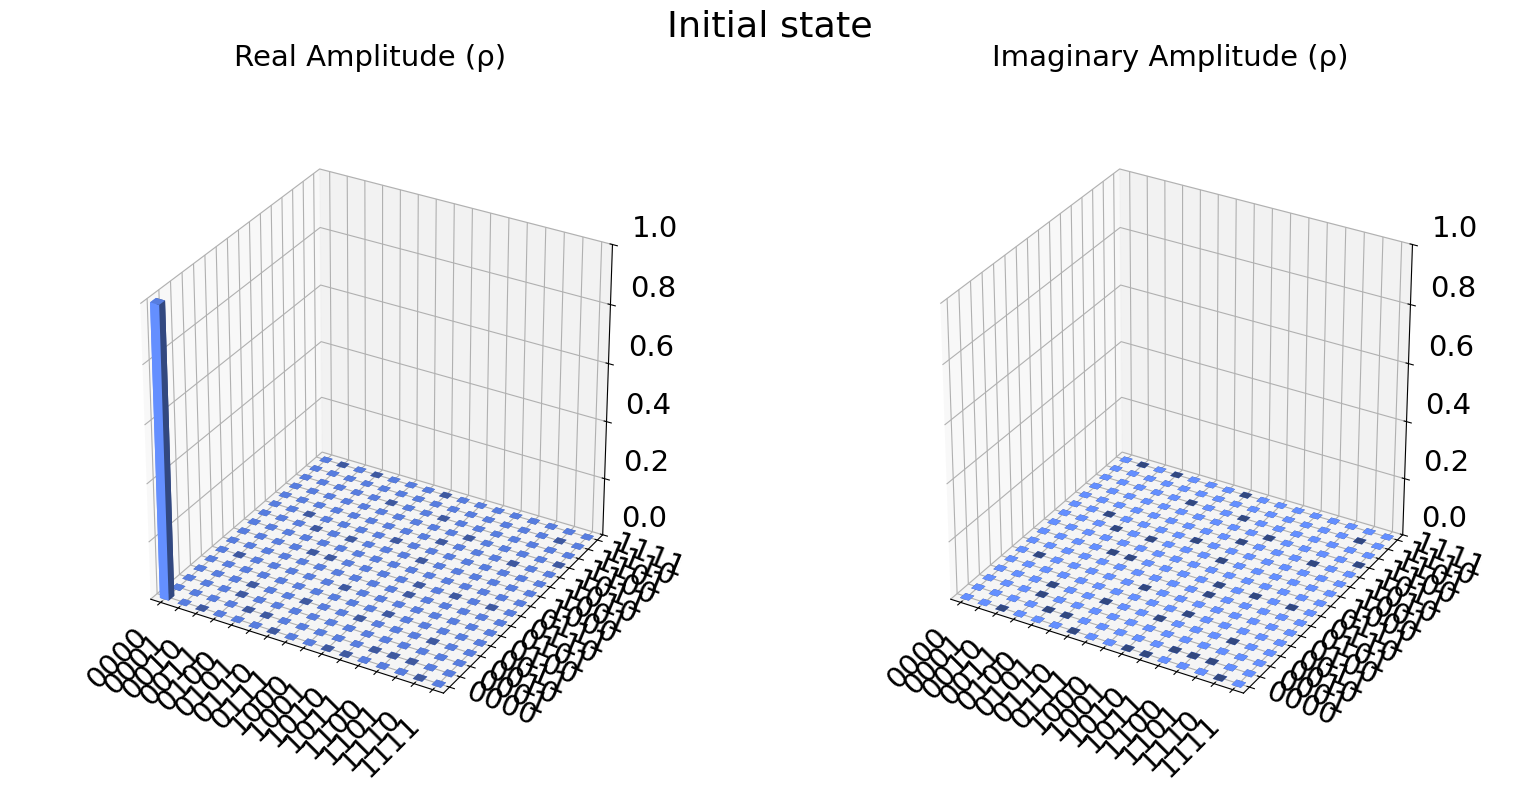

Measurement Counts (Initial): {np.str_('0000'): np.float64(1.0)}


'Final state:'

<IPython.core.display.Latex object>

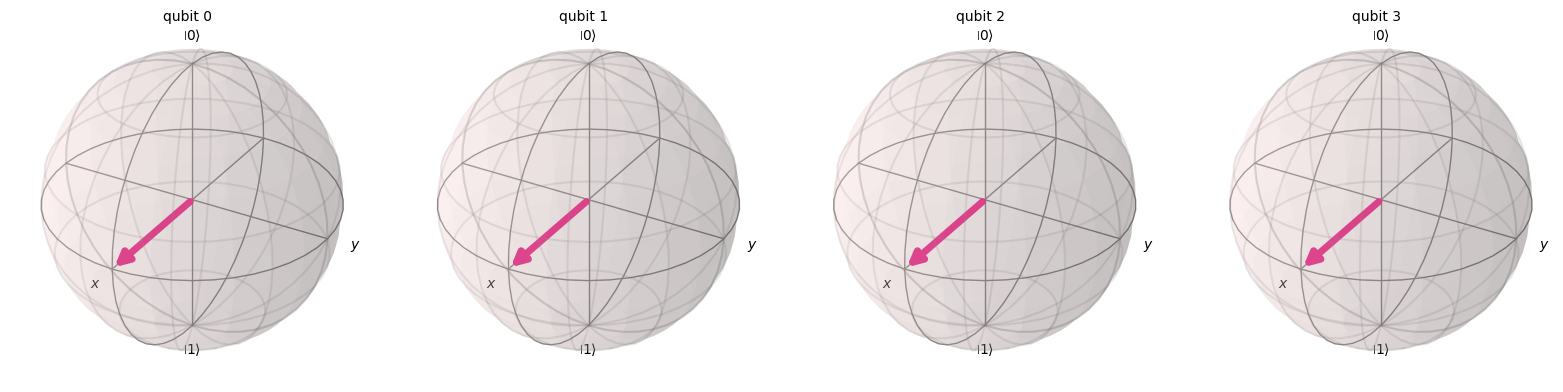

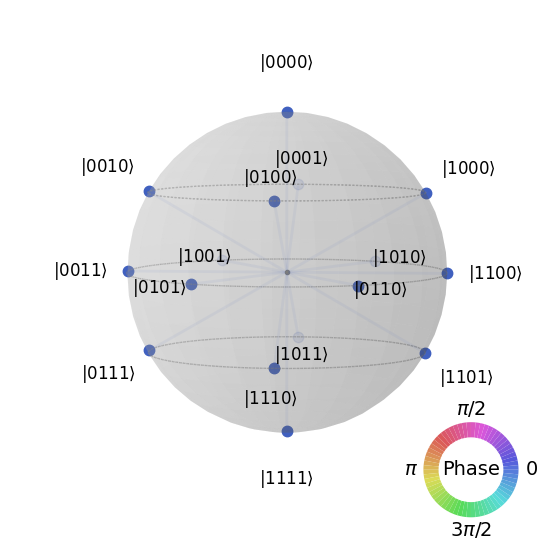

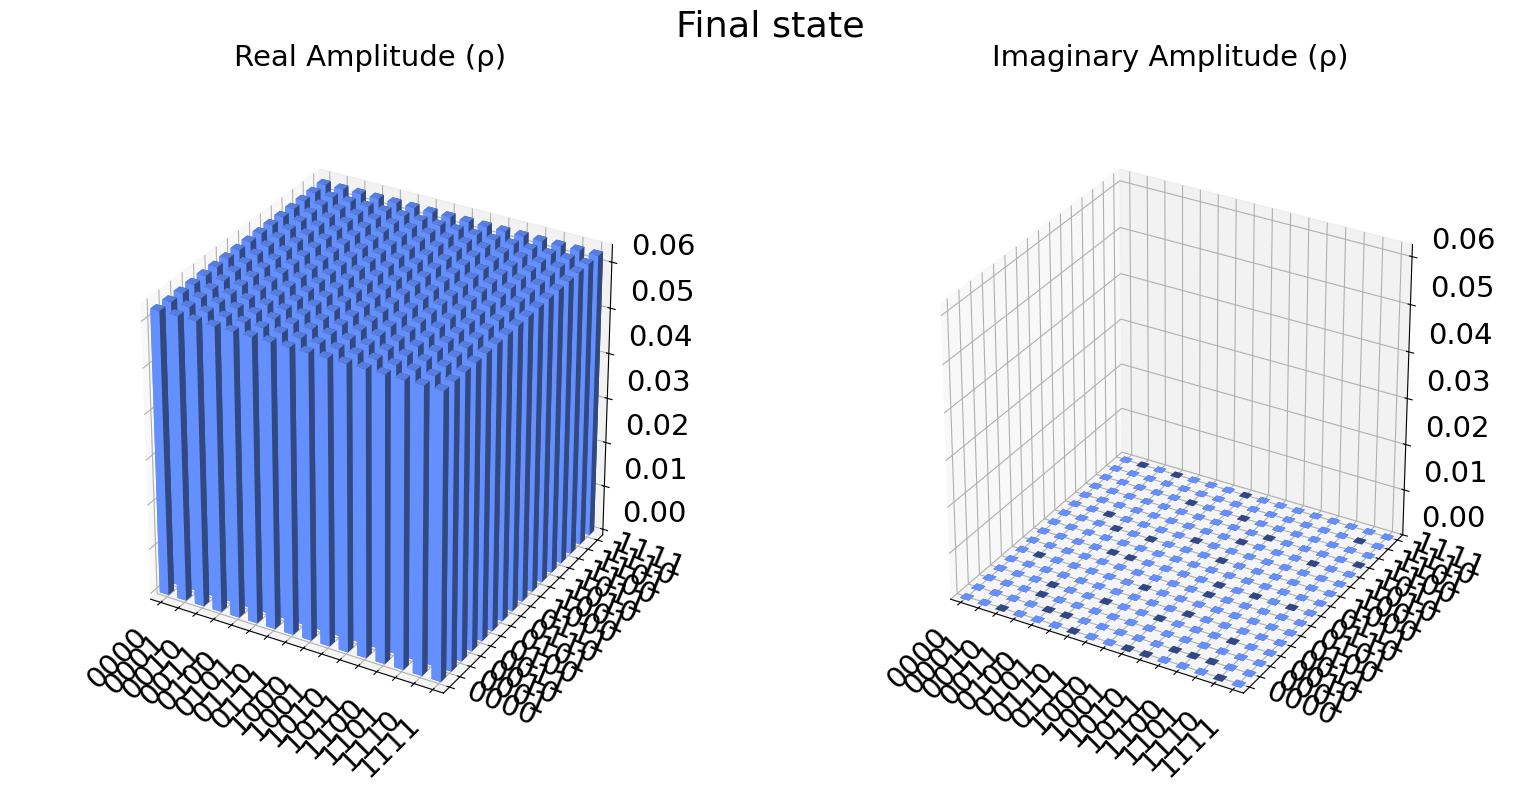

Measurement Counts (Final): {np.str_('0000'): np.float64(0.0625), np.str_('0001'): np.float64(0.0625), np.str_('0010'): np.float64(0.0625), np.str_('0011'): np.float64(0.0625), np.str_('0100'): np.float64(0.0625), np.str_('0101'): np.float64(0.0625), np.str_('0110'): np.float64(0.0625), np.str_('0111'): np.float64(0.0625), np.str_('1000'): np.float64(0.0625), np.str_('1001'): np.float64(0.0625), np.str_('1010'): np.float64(0.0625), np.str_('1011'): np.float64(0.0625), np.str_('1100'): np.float64(0.0625), np.str_('1101'): np.float64(0.0625), np.str_('1110'): np.float64(0.0625), np.str_('1111'): np.float64(0.0625)}


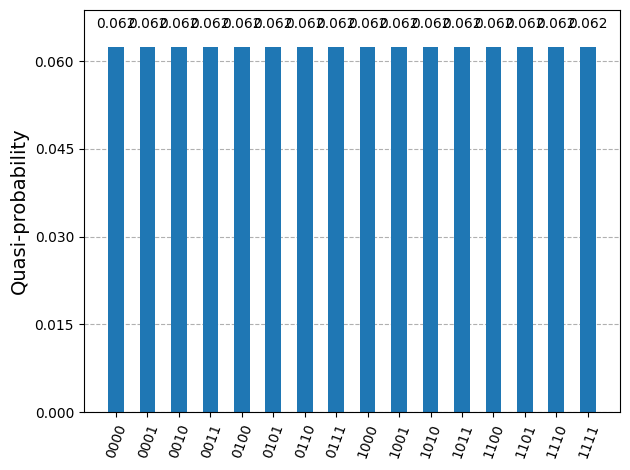

In [47]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere,plot_state_city,plot_histogram
import numpy as np
import matplotlib.pyplot as plt


#Defining function for generalized rotations
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

#defining function to swap the final qubits
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

#defining function to perform QFT using qft_rotations and swap_registers
def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Create the circuit (for example for 4 qubits)
qc = QuantumCircuit(4)

# Encode the state (apply negate gate when necessary)
#qc.x(n) [to negate a qubit]

display(qc.draw("mpl"))

#AerSimulator
sim = AerSimulator()

#Displaying initial statevector by simulating using simulator
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
display("Initial state:",statevector.draw("latex"))
display(plot_bloch_multivector(statevector))
display(plot_state_qsphere(statevector))
display(plot_state_city(statevector, title='Initial state'))

#To present the probability measurements of initial state
result = sim.run(qc_init, shots=1000).result()
counts = result.get_counts(qc_init)
print(f"Measurement Counts (Initial): {counts}")
plot_histogram(counts)


#Apply QFT to our circuit
qft(qc,4)
qc.draw("mpl")

#Saving final statevector using simulator
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
display("Final state:",statevector.draw("latex"))
display(plot_bloch_multivector(statevector))
display(plot_state_qsphere(statevector))
display(plot_state_city(statevector, title='Final state'))

#Run the simulation
result1 = sim.run(qc, shots=1000).result()
counts1 = result1.get_counts(qc)
print(f"Measurement Counts (Final): {counts1}")
plot_histogram(counts1)


## Inverse QFT code (for 3-qubit state) (using QFT output of integer 5)

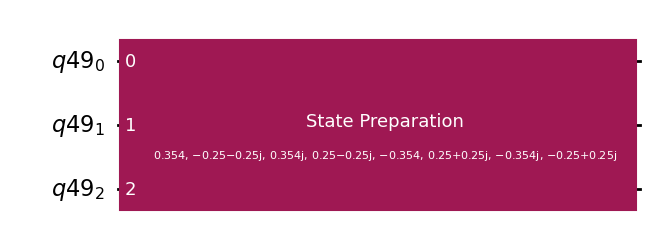

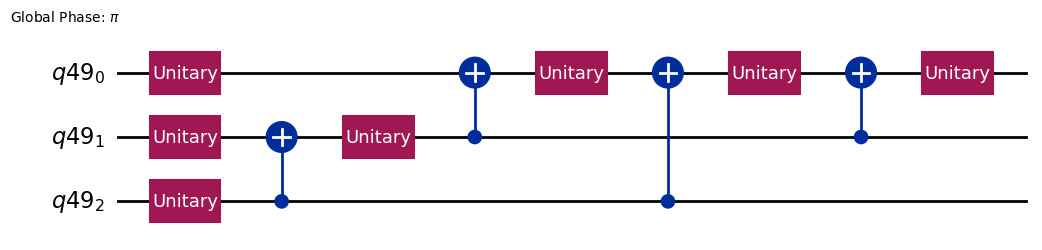

'q_initial:'

<IPython.core.display.Latex object>

'q_final:'

<IPython.core.display.Latex object>

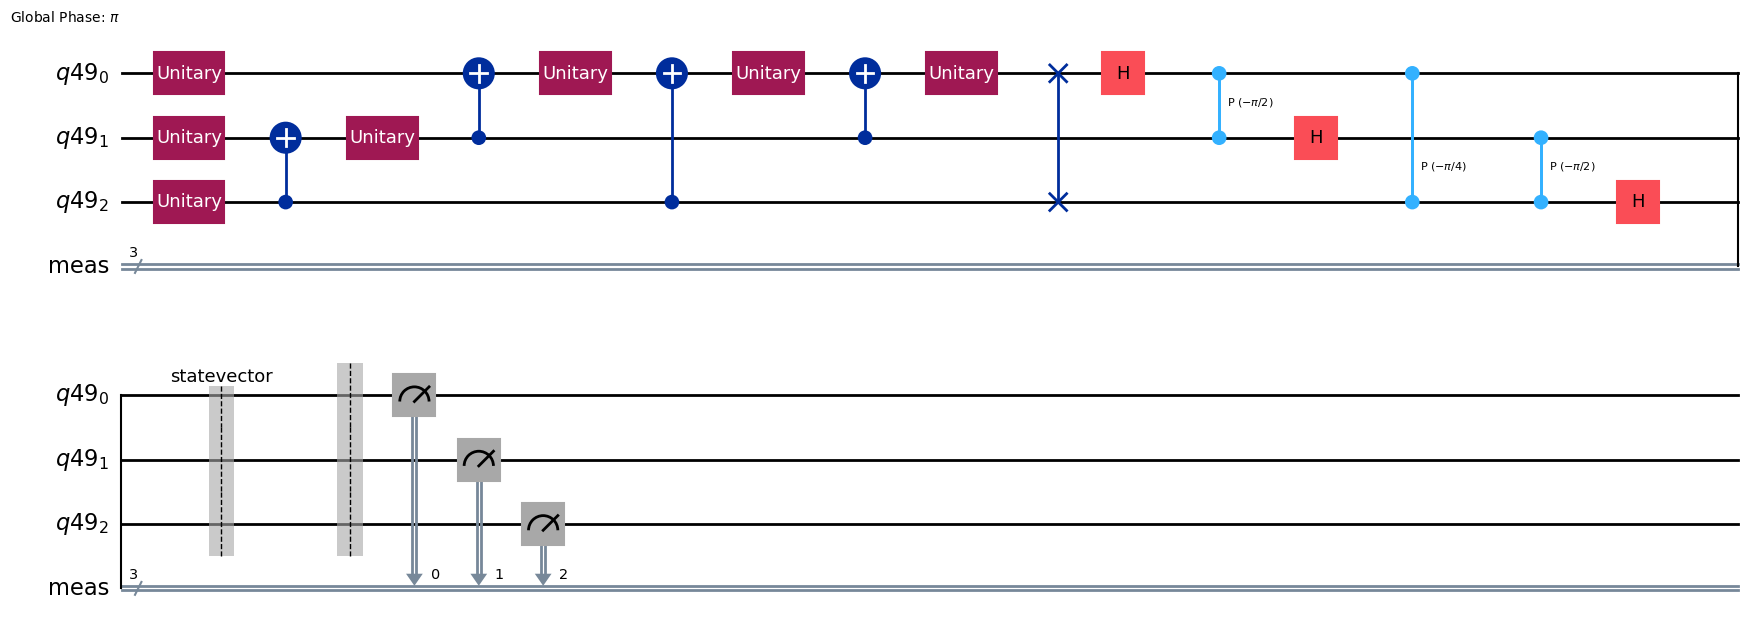

Measurement Counts: {'101': 1024}


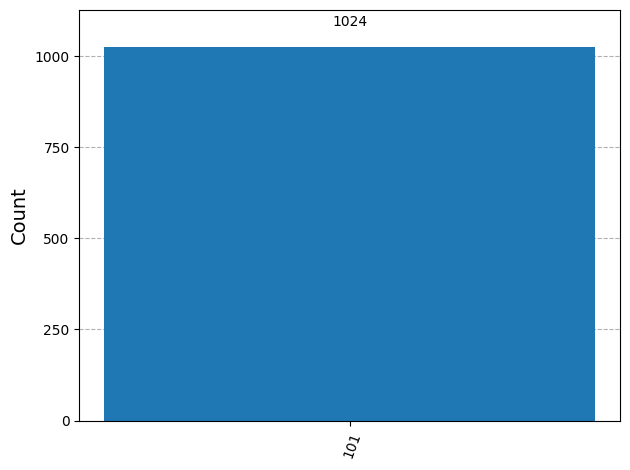

In [67]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import StatePreparation
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import math

q=QuantumRegister(3)
c=ClassicalRegister(3)
qc = QuantumCircuit(q)

#State preparation
state = [1/(2*math.sqrt(2)),-(1/4 + 1j/4),1j/(2*math.sqrt(2)),(1/4-1j/4),-1/(2*math.sqrt(2)),(1/4 + 1j/4),-1j/(2*math.sqrt(2)),-(1/4-1j/4)]
prep = StatePreparation(state)
qc.append(prep,[0,1,2])

#Circuit before transpilation
display(qc.draw("mpl"))

#Simulator
simulator = AerSimulator()

#transpiled circuit
tqc = transpile(qc,simulator)

#Circuit after transpilation
display(tqc.draw("mpl"))

#Displaying initial statevector
qc_init = tqc.copy()
qc_init.save_statevector()
statevector = simulator.run(qc_init).result().get_statevector()
display("q_initial:",statevector.draw("latex"))

#Doing Inverse QFT (swap + HGate + Controlled rotations(with -ve sign))
tqc.swap(q[0],q[2])

tqc.h(q[0])

tqc.cp(-np.pi/2,q[0],q[1])
tqc.h(q[1])

tqc.cp(-np.pi/4,q[0],q[2])
tqc.cp(-np.pi/2,q[1],q[2])
tqc.h(q[2])

#displaying final statevector
qc_fin = tqc.copy()
qc_fin.save_statevector()
statevector = simulator.run(qc_fin).result().get_statevector()
display("q_final:",statevector.draw("latex"))

#Measurement
qc_fin.measure_all()

#Display the circuit
display(qc_fin.draw("mpl"))

# execute circuit with AerSimulator
job = simulator.run([qc_fin])
result = job.result()
counts = result.get_counts(0)
print(f"Measurement Counts: {counts}")
plot_histogram(counts)